### Modelo dinámico SIR para enfermedades transmitibles ###

__Realizado por:__  Boris Anghelo Rodríguez Rey y Nicole Rivera Parra

_Instituto de Física, Universidad de Antioquia_

A continuación se presentan algunas simulaciones a epidemias o enfermedades a partir de modelos SIR. 

Este notebook se prepara para el taller "Modelación matemática de la epidemia de COVID-19" realizado el Lunes 10 de Agosto de 2020.

In [1]:
###=== Importar librerías a usar ===###
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import glob

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Primero establecemos las hipotesis sobre la población que vamos a modelar, estas son bastante realistas en las epidemias de gripes. 

__1)__ La población es constante, es decir, el saldo de nacimientos, defunciones y fenómenos migratorios es nulo.

__2)__ La enfermedad es lo suficientemente suave como para que los enfermos no dejen de hacer una vida normal, y éstos no se curan completamente durante el periodo de la epidemia; con ello se evita la reinfección.

__3)__ La población se encuentra repartida en tres grupos de población: los “susceptibles ($S$)” (personas que no poseen suficiente resistencia contra el agente patógeno causante de la enfermedad), los “infectados ($I$)” (personas con cierto trastorno producido por la enfermedad) y los "inmunes ($R$)" (personas que poseen suficiente resistencia contra el agente patógeno causante de la enfermedad debido a que han desarrollado anticuerpos). 

Luego, describimos la interacción entre estas tres variables de estado a través de un conjunto de ecuaciones que continen toda la información de su cambio en el tiempo con base en las caracteristicas de la enfermedad.

$ \frac{dS}{dt} =$ perdida de inmunidad - incidencia - vacunación 

$ \frac{dI}{dt} =$ incidencia + reinfección - recuperación - muertes 

$ \frac{dR}{dt} =$ recuperación + vacunación - reinfección - perdida de inmunidad

Cada una de estas interacciones dependen de las variables de estado y algunos parametros como:

- Tasa de contagio ($\gamma_I$)
- Tasa de mortalidad ($\gamma_D$)
- Tasa de recuperación ($\gamma_R$)
- Tasa de reinfección ($\gamma_B$)
- Tasa de perdida de inmunidad ($\gamma_P$)
- Tasa de vacunación ($\gamma_X$)

Así pues, las ecuaciones diferenciales que describen nuestro sistema, de manera general y con base en lo expuesto anterioremente, serán:

$$ \frac{dS}{dt} = \gamma_P R - \gamma_X S - \gamma_I \frac{SI}{S + I + R} $$ 

$$ \frac{dI}{dt} = \gamma_I \frac{SI}{S + I + R} - \gamma_B R - \gamma_R I - \gamma_D I  $$ 

$$ \frac{dR}{dt} = \gamma_R I + \gamma_X S - \gamma_B R - \gamma_P R $$ 

In [2]:
###=== Definiendo sistema de ecuaciones ===###
def our_sys(y, t, gI, gD, gR, gB, gP, gX):
    S, I, R = y
    
    dS = gP*R - gX*S - gI*S*I/(S+I+R)
    dI = gI*S*I/(S+I+R) + gB*R - gR*I - gD*I
    dR = gR*I + gX*S - gB*R - gP*R
    
    return [dS, dI, dR]

Con nuestro sistema definido, solucionaremos el conjunto de ecuaciones diferenciales especificando nuestros parametros, condiciones inciales y tiempo de integración para casos de interés. 

$ \\ $

__Ejemplo 1__ 

Difusión de una enfermedad en una población inicial de 500000 susceptibles, 12 infectados y 0 inmunes. Suponemos que no existe pérdida de inmunidad, ni reinfección, ni vacunación, ni letalidad. La tasa de contagio es de 0.6 (1/días) y la de recuperación es 0.1 (1/días).

In [3]:
###=== Establecemos datos del ejemplo 1 ===###
gI_ex1 = 0.6 #Tasa de contagio
gD_ex1 = 0.0 #Tasa de mortalidad 
gR_ex1 = 0.1 #Tasa de recuperación 
gB_ex1 = 0.0 #Tasa de reinfección  
gP_ex1 = 0.0 #Tasa de pérdida de inmunidad
gX_ex1 = 0.0 #Tasa de vacunación 

cond_ex1 = [500000, 12, 0] #Condiciones iniciales

time_ex1 = np.arange(0, 100) #Tiempo de integración

Para integrar el sistema de ecuaciones difrenenciales usamos la función odeint de la librería scipy.integrate 

    scipy.integrate.odeint(func, y0, t, args=())
    
donde func es la función donde definimos nuestro sistema de ecuaciones, y0 son las condiciones iniciales, t es el tiempo de integración y args debe contener todos los parametros. 

In [4]:
###=== Integramos el ejemplo 1 usando odeint ===###
SOL_ex1 = integrate.odeint(our_sys, cond_ex1, time_ex1, args=(gI_ex1, gD_ex1, gR_ex1, gB_ex1, gP_ex1, gX_ex1))


Para visualizar nuestras soluciones en el tiempo usamos la librería matplotlib.pylot que nombramos plt, tal que:

    plt.plot(X, Y)
    
nos hace una gráfica 2D donde X corresponde al eje horizontal y Y al eje vertical.

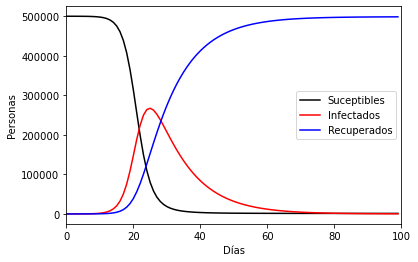

In [5]:
###=== Visualizando evolución del ejemplo 1 ===###
plt.plot(time_ex1, SOL_ex1[:, 0], 'k',label="Suceptibles")
plt.plot(time_ex1, SOL_ex1[:, 1], 'r',label="Infectados")
plt.plot(time_ex1, SOL_ex1[:, 2], 'b',label="Recuperados")
plt.xlabel("Días")
plt.ylabel("Personas")
plt.xlim(0, 100)
plt.legend()
plt.show()

_¿Qué podemos ver en la dinámica?_

$ \ $


__Ejemplo 2__ 
En la misma población anterior, cambiaremos unicamente la tasa de recuperación a 0.3 (1/días).

In [6]:
###=== Cambiamos el parámetro ===###
gR_ex2 = 0.3 #Tasa de recuperación modificada

In [7]:
###=== Integramos el ejemplo 2 usando odeint ===###
SOL_ex2 = integrate.odeint(our_sys, cond_ex1, time_ex1, args=(gI_ex1, gD_ex1, gR_ex2, gB_ex1, gP_ex1, gX_ex1))


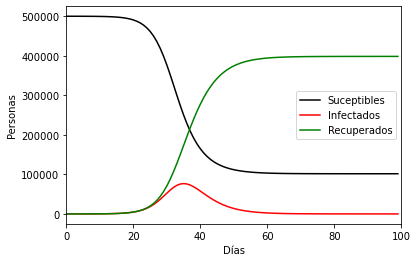

In [8]:
###=== Visualizando evolución del ejemplo 2 ===###
plt.plot(time_ex1, SOL_ex2[:, 0], 'k',label="Suceptibles")
plt.plot(time_ex1, SOL_ex2[:, 1], 'r',label="Infectados")
plt.plot(time_ex1, SOL_ex2[:, 2], 'g',label="Recuperados")
plt.xlabel("Días")
plt.ylabel("Personas")
plt.xlim(0, 100)
plt.legend()
plt.show()

_¿Qué cambia en la dinámica?_

$ \ $

__Ejemplo 3__

Utilizando los mismos datos del ejemplo 1, añadiremos un flujo correspondiente a cierta pérdida de inmunidad con una tasa de 0.05 (1/días)

In [9]:
###=== Cambiamos el parámetro ===###
gP_ex3 = 0.05 #Tasa de pérdida de inmunidad 

In [10]:
###=== Integramos el ejemplo 3 usando odeint ===###
SOL_ex3 = integrate.odeint(our_sys, cond_ex1, time_ex1, args=(gI_ex1, gD_ex1, gR_ex1, gB_ex1, gP_ex3, gX_ex1))



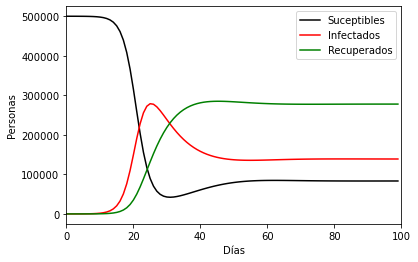

In [11]:
###=== Visualizando evolución del ejemplo 3 ===###
plt.plot(time_ex1, SOL_ex3[:, 0], 'k',label="Suceptibles")
plt.plot(time_ex1, SOL_ex3[:, 1], 'r',label="Infectados")
plt.plot(time_ex1, SOL_ex3[:, 2], 'g',label="Recuperados")
plt.xlabel("Días")
plt.ylabel("Personas")
plt.xlim(0, 100)
plt.legend()
plt.show()

_Ejemplo de epidemia seguido de endemia_ 

$ \ $

Ahora... ¿Qué pasa si la enfermedad presenta cierto grado de mortalidad?

__Ejemplo 4__

Difusión de una enferemdad con la misma población inicial del ejemplo 1 (500000, 12, 0). Pero, los parametros del modelo serán los siguientes:

- Tasa de contagio ($\gamma_I = 0.6$)
- Tasa de mortalidad ($\gamma_D = 0.1 $)
- Tasa de recuperación ($\gamma_R = 0.1 $)
- Tasa de reinfección ($\gamma_B = 0.1 $)
- Tasa de perdida de inmunidad ($\gamma_P = 0.05$)
- Tasa de vacunación ($\gamma_X = 0.1$)

In [12]:
###=== Cambiamos los parámetros ===###
gI_ex4 = 0.6 #Tasa de contagio
gD_ex4 = 0.1 #Tasa de mortalidad 
gR_ex4 = 0.1 #Tasa de recuperación 
gB_ex4 = 0.1 #Tasa de reinfección  
gP_ex4 = 0.05 #Tasa de pérdida de inmunidad
gX_ex4 = 0.1 #Tasa de vacunación

In [13]:
###=== Integramos el ejemplo 4 usando odeint ===###
SOL_ex4 = integrate.odeint(our_sys, cond_ex1, time_ex1, args=(gI_ex4, gD_ex4, gR_ex4, gB_ex4, gP_ex4, gX_ex4))


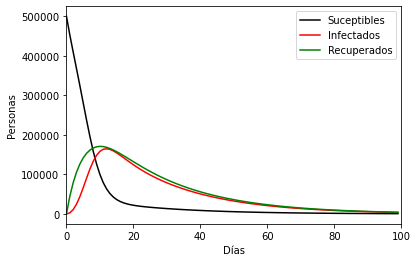

In [14]:
###=== Visualizando evolución del ejemplo 3 ===###
plt.plot(time_ex1, SOL_ex4[:, 0], 'k',label="Suceptibles")
plt.plot(time_ex1, SOL_ex4[:, 1], 'r',label="Infectados")
plt.plot(time_ex1, SOL_ex4[:, 2], 'g',label="Recuperados")
plt.xlabel("Días")
plt.ylabel("Personas")
plt.xlim(0, 100)
plt.legend()
plt.show()

_¿Qué pasó con la población?_

$ \ $  

### Modelo SIR para COVID-19 usando algunos datos de Colombia ###

Ahora, con base en lo explicado sobre modelos SIR y las diferentes dinámicas posibles, trabajaremos las ecuaciones y parámetros propuestos por el Observatorio Nacional de Salud, Instituto Nacional de Salud de Colombia, el cual tiene la siguiente forma:

$$ \frac{dS}{dt} =  - \beta S I  $$ 

$$ \frac{dI}{dt} = \beta S I - \gamma I $$ 

$$ \frac{dR}{dt} = \gamma I  $$ 

donde $\beta$ es la tasa de infección y $\gamma$ la tasa de recuperación.

In [15]:
###=== Definimos el sistema de Colombia ===###

def col_sys(y, t, beta, g):
    S, I, R = y
    
    dS = - beta*S*I 
    dI = beta*S*I - g*I 
    dR = g*I
    
    return [dS, dI, dR]

Los parametros se definirán de acuerdo a dos escenarios: el escenario de Bogotá y el escenario de Medellín. 

Cada uno de estos estará caracterizado por el número básico de reproducción $R_0$ definido como $R_0 = \frac{\beta}{\gamma}$

- Bogotá:
$R_0 \approx 2.28$. Proporción asintomáticos: $11.1 \%$ sobre el total de infectados

- Medellín:
$R_0 \approx 2.28$. Proporción asintomáticos: $11.1 \%$ sobre el total de infectados

En ambos casos se asumen 5 infectados inicialmente.

In [16]:
###=== Definimos los parámetros para Medellín ===###
b_med = 0.228
g_med = 0.1

cond_med = [2.4*10**6, 5, 0]

###=== Definimos los parámetros para Bogotá ===###
b_bog = 0.228
g_bog = 0.1

cond_bog = [7.4*10**6, 5, 0]

In [17]:
###=== Definimos tiempo de integración ===###
time_col = np.arange(0, 100)

In [18]:
###=== Integramos ejemplo de Medellin con odeint ===###
SOL_med = integrate.odeint(col_sys, cond_med, time_col, args=(b_med, g_med))

###=== Integramos ejemplo de Bogota con odeint ===###
SOL_bog = integrate.odeint(col_sys, cond_bog, time_col, args=(b_bog, g_bog))


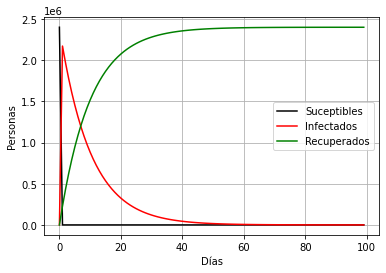

In [19]:
###=== Visualizando evolución para Medellín ===###
plt.plot(time_col, SOL_med[:, 0], 'k',label="Suceptibles")
plt.plot(time_col, SOL_med[:, 1], 'r',label="Infectados")
plt.plot(time_col, SOL_med[:, 2], 'g',label="Recuperados")
plt.xlabel("Días")
plt.ylabel("Personas")
plt.grid()
plt.legend()
plt.show()

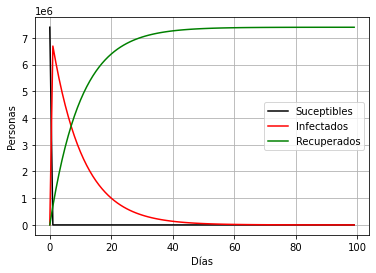

In [20]:
###=== Visualizando evolución para Bogota ===###
plt.plot(time_col, SOL_bog[:, 0], 'k',label="Suceptibles")
plt.plot(time_col, SOL_bog[:, 1], 'r',label="Infectados")
plt.plot(time_col, SOL_bog[:, 2], 'g',label="Recuperados")
plt.xlabel("Días")
plt.ylabel("Personas")
plt.grid()
plt.legend()
plt.show()